In [34]:
pip install openml

In [35]:
pip install pandas scipy

In [37]:
import requests
from scipy.io import arff
import pandas as pd

# Step 1: Download the ARFF file from GitHub
url = 'https://raw.githubusercontent.com/DarceCat/Adrian-Milroy/main/dataset_31_credit-g.arff'
response = requests.get(url)

# Save the file locally
with open('dataset_31_credit-g.arff', 'wb') as f:
    f.write(response.content)

# Step 2: Load ARFF file
data = arff.loadarff('dataset_31_credit-g.arff')

# Step 3: Convert to a DataFrame
df = pd.DataFrame(data[0])

# Step 4: Decode byte strings to regular strings for object-type columns
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Step 5: Inspect the cleaned DataFrame
print(df.head())




  checking_status  duration                  credit_history  \
0              <0       6.0  critical/other existing credit   
1        0<=X<200      48.0                   existing paid   
2     no checking      12.0  critical/other existing credit   
3              <0      42.0                   existing paid   
4              <0      24.0              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv         1169.0  no known savings        >=7   
1             radio/tv         5951.0              <100     1<=X<4   
2            education         2096.0              <100     4<=X<7   
3  furniture/equipment         7882.0              <100     4<=X<7   
4              new car         4870.0              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                     4.0         male single          none  ...   
1                     2.0  female div/dep/mar          none  ...

<ipython-input-37-a0b8b752fc8f>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


In [38]:
# Decode byte strings for each column individually using map
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Inspect the cleaned DataFrame
print(df.head())


  checking_status  duration                  credit_history  \
0              <0       6.0  critical/other existing credit   
1        0<=X<200      48.0                   existing paid   
2     no checking      12.0  critical/other existing credit   
3              <0      42.0                   existing paid   
4              <0      24.0              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv         1169.0  no known savings        >=7   
1             radio/tv         5951.0              <100     1<=X<4   
2            education         2096.0              <100     4<=X<7   
3  furniture/equipment         7882.0              <100     4<=X<7   
4              new car         4870.0              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                     4.0         male single          none  ...   
1                     2.0  female div/dep/mar          none  ...

In [39]:
#Examine the dataset
print("#Rows: ",df.shape[0])
print("#Columns: ", df.shape[1])
print("\nColumn Names:", df.columns.tolist())
print("\nData Types of Each Column:\n", df.dtypes)

# Print the range of values per column
column_ranges = df.describe(include='all').transpose()[['min', 'max']]
print(column_ranges)

print("___Missing Values___")
print(df.isnull().sum())


#Rows:  1000
#Columns:  21

Column Names: ['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker', 'class']

Data Types of Each Column:
 checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_depe

In [44]:
# List of columns that need one-hot encoding
categorical_columns = ['checking_status', 'credit_history', 'purpose', 'savings_status',
                       'employment', 'personal_status', 'other_parties', 'property_magnitude',
                       'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class']

# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

# Check the shape after encoding
print("New shape after encoding:", df_encoded.shape)


   duration  credit_amount  installment_commitment  residence_since   age  \
0       6.0         1169.0                     4.0              4.0  67.0   
1      48.0         5951.0                     2.0              2.0  22.0   
2      12.0         2096.0                     2.0              3.0  49.0   
3      42.0         7882.0                     2.0              4.0  45.0   
4      24.0         4870.0                     3.0              4.0  53.0   

   existing_credits  num_dependents  checking_status_<0  \
0               2.0             1.0                True   
1               1.0             1.0               False   
2               1.0             2.0               False   
3               1.0             2.0                True   
4               2.0             2.0                True   

   checking_status_>=200  checking_status_no checking  ...  \
0                  False                        False  ...   
1                  False                        False  ...

In [48]:
#Examine the dataset
print("#Rows: ",df_encoded.shape[0])
print("#Columns: ", df_encoded.shape[1])
print("\nColumn Names:", df_encoded.columns.tolist())
print("\nData Types of Each Column:\n", df_encoded.dtypes)

# Print the range of values per column
column_ranges = df_encoded.describe(include='all').transpose()[['min', 'max']]
print(column_ranges)

print("___Missing Values___")
print(df_encoded.isnull().sum())

#Rows:  1000
#Columns:  49

Column Names: ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents', 'checking_status_<0', 'checking_status_>=200', 'checking_status_no checking', 'credit_history_critical/other existing credit', 'credit_history_delayed previously', 'credit_history_existing paid', 'credit_history_no credits/all paid', 'purpose_domestic appliance', 'purpose_education', 'purpose_furniture/equipment', 'purpose_new car', 'purpose_other', 'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining', 'purpose_used car', 'savings_status_500<=X<1000', 'savings_status_<100', 'savings_status_>=1000', 'savings_status_no known savings', 'employment_4<=X<7', 'employment_<1', 'employment_>=7', 'employment_unemployed', 'personal_status_male div/sep', 'personal_status_male mar/wid', 'personal_status_male single', 'other_parties_guarantor', 'other_parties_none', 'property_magnitude_life insurance', 'property_magnitude_no known p

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Assuming 'class_good' is the target variable
X = df_encoded.drop('class_good', axis=1)
y = df_encoded['class_good']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.768
Classification Report:
               precision    recall  f1-score   support

       False       0.62      0.51      0.56        72
        True       0.82      0.87      0.84       178

    accuracy                           0.77       250
   macro avg       0.72      0.69      0.70       250
weighted avg       0.76      0.77      0.76       250



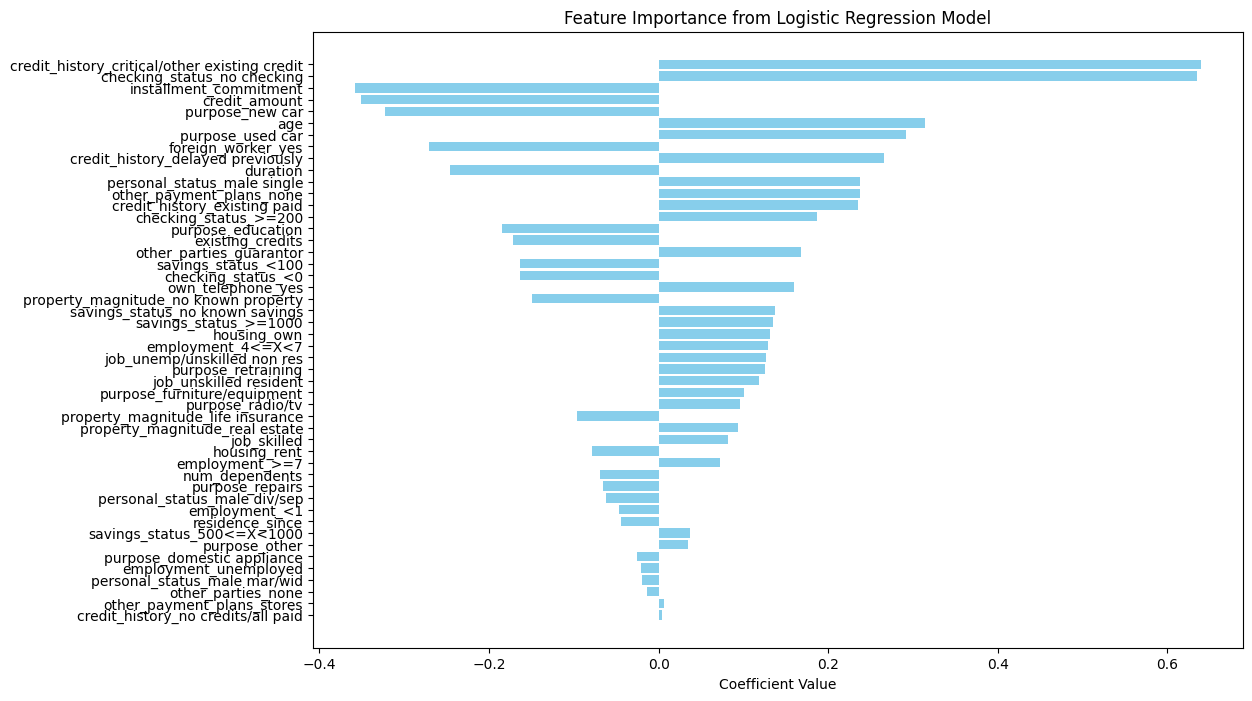

Top 10 Contributing Features:
                                          Feature  Absolute Coefficient
10  credit_history_critical/other existing credit              0.639236
9                     checking_status_no checking              0.635318
2                          installment_commitment              0.357931
1                                   credit_amount              0.351452
17                                purpose_new car              0.322782
4                                             age              0.314401
22                               purpose_used car              0.292301
47                             foreign_worker_yes              0.270891
11              credit_history_delayed previously              0.265540
0                                        duration              0.246469


In [50]:
import matplotlib.pyplot as plt

# Retrieve feature names
feature_names = X.columns

# Get the coefficients from the trained model
coefficients = model.coef_[0]

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of coefficients
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance from Logistic Regression Model')
plt.gca().invert_yaxis()  # To have the largest coefficients at the top
plt.show()

# Print the top 10 contributing features by absolute value of coefficients
top_10_features = feature_importance.head(10)
print("Top 10 Contributing Features:")
print(top_10_features[['Feature', 'Absolute Coefficient']])


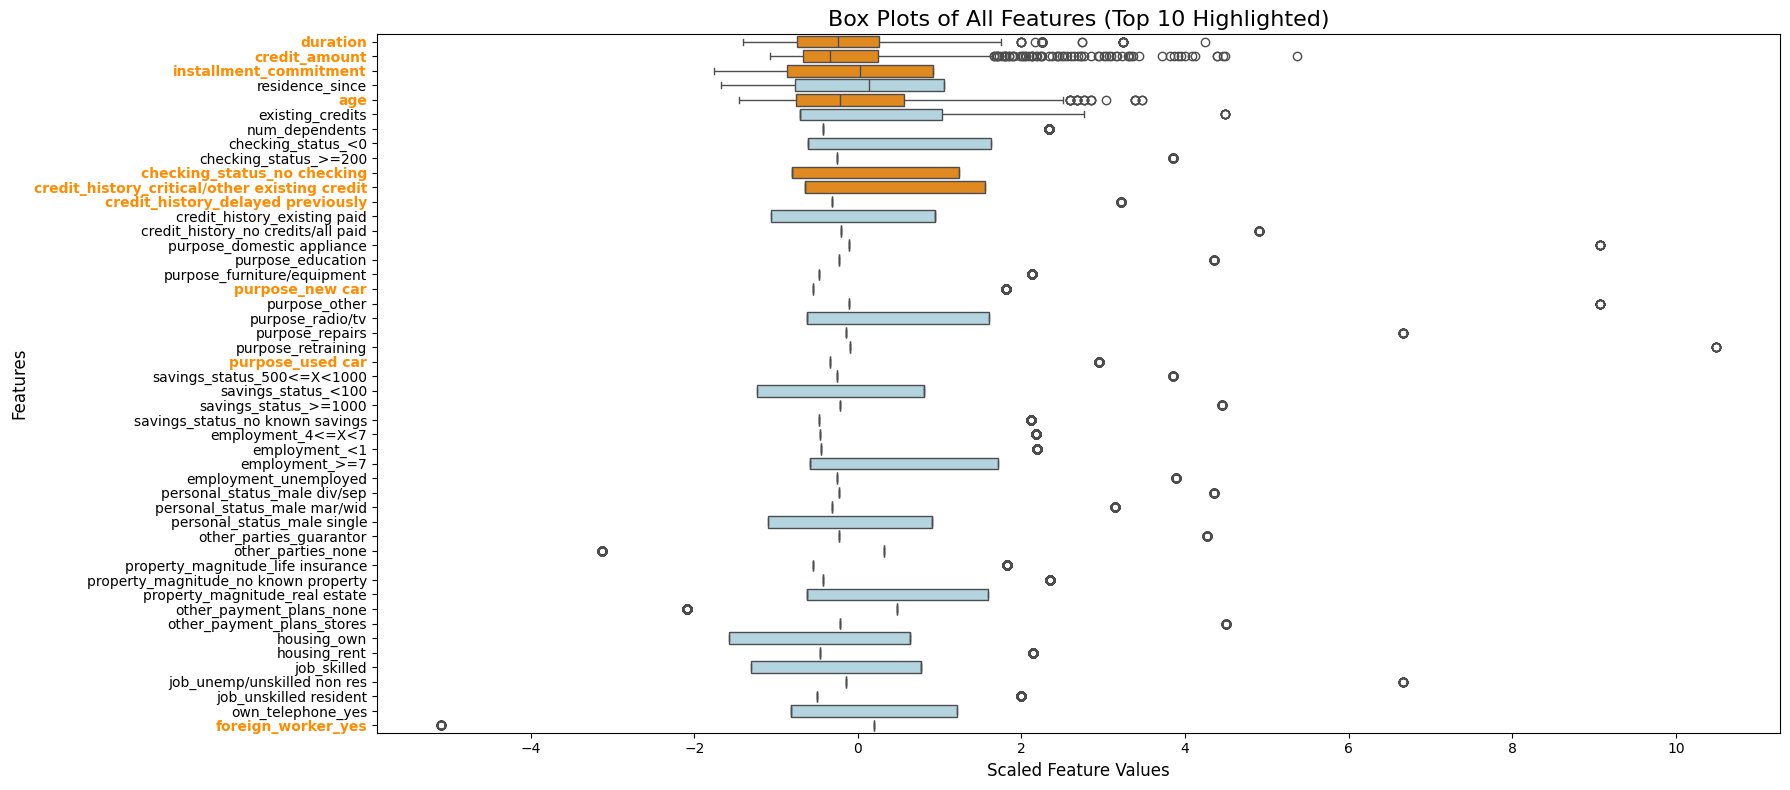

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the scaled features for easier plotting
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Get the top 10 contributing features based on the absolute coefficient values
top_10_features = feature_importance.head(10)['Feature'].values

# Create a color palette where the top 10 features have a different color
colors = ['lightblue' if feature not in top_10_features else 'darkorange' for feature in X.columns]

# Set the size of the plot
plt.figure(figsize=(18, 8))

# Create box plots for all the features, highlighting the top 10 features
sns.boxplot(data=X_scaled_df, orient="h", palette=colors)

# Customize y-axis labels: bold and orange for top 10 features
ax = plt.gca()
for label in ax.get_yticklabels():
    if label.get_text() in top_10_features:
        label.set_fontweight('bold')  # Bold the label
        label.set_color('darkorange')  # Make it orange

# Add titles and labels
plt.title("Box Plots of All Features (Top 10 Highlighted)", fontsize=16)
plt.xlabel("Scaled Feature Values", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()



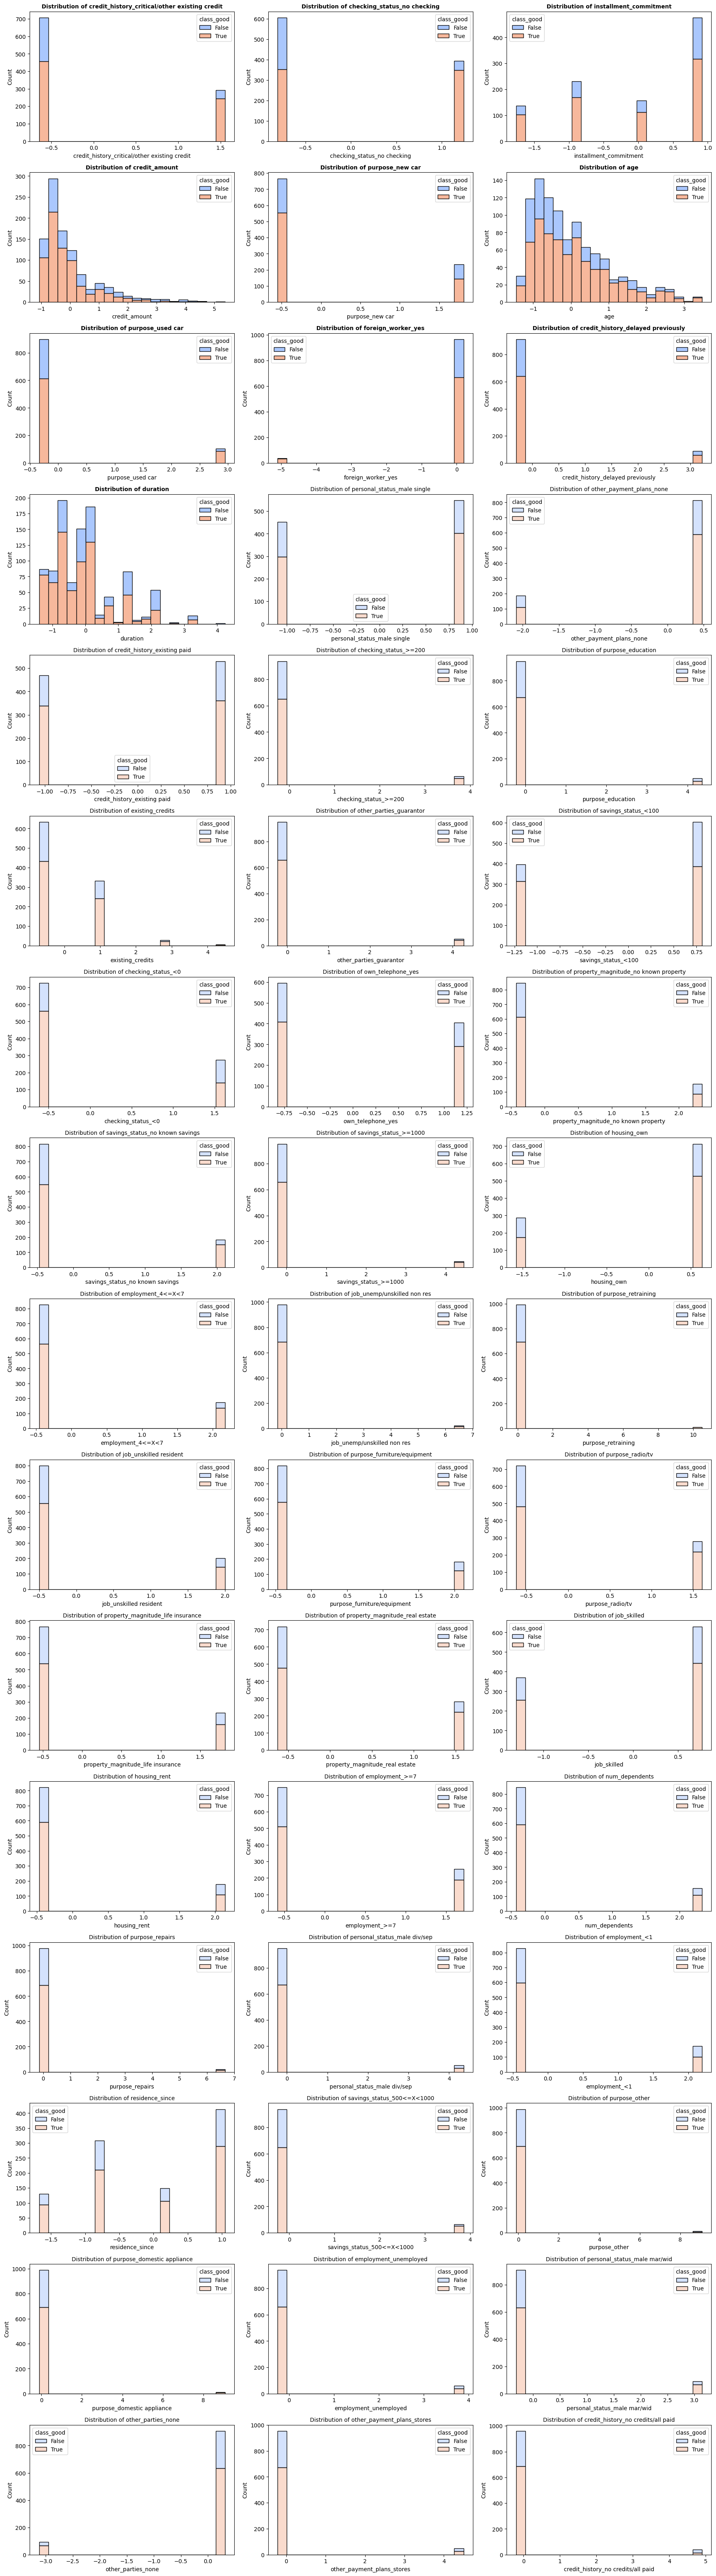

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort features based on their absolute coefficient (feature importance)
sorted_features = feature_importance['Feature'].values

# Set up a grid of subplots
num_features = X_scaled_df.shape[1]
num_rows = (num_features // 3) + 1  # Assuming 3 plots per row

plt.figure(figsize=(18, num_rows * 4))

# Iterate through the sorted features and plot histograms
for i, feature in enumerate(sorted_features):
    plt.subplot(num_rows, 3, i + 1)

    # Combine the feature with class_good for easier plotting
    data = pd.concat([X_scaled_df[feature], y], axis=1)
    data.columns = [feature, 'class_good']

    # Determine transparency (alpha) for top 10 features
    alpha_value = 1 if i < 10 else 0.5  # Top 10 features will have alpha=1, others alpha=0.5

    # Plot a histogram with hue as 'class_good'
    sns.histplot(data=data, x=feature, hue='class_good', multiple='stack', palette='coolwarm', bins=20, alpha=alpha_value)

    # Set titles and labels
    plt.title(f'Distribution of {feature}', fontsize=10, fontweight='bold' if i < 10 else 'normal')
    plt.xlabel(feature)
    plt.ylabel('Count')

# Adjust layout for better fit
plt.tight_layout()
plt.show()



In [78]:
import pandas as pd

# Create binary columns based on the specified condition
df_filtered = df_encoded.copy()  # Make a copy of the original DataFrame

# Define the threshold condition for the parameters
df_filtered['credit_history_below_threshold'] = df_encoded['credit_history_critical/other existing credit'] < 1
df_filtered['checking_status_below_threshold'] = df_encoded['checking_status_no checking'] < 1

# Filter rows where either 'credit_history_below_threshold' or 'checking_status_below_threshold' is False
troubleset = df_filtered[(df_filtered['credit_history_below_threshold'] == True) &
                        (df_filtered['checking_status_below_threshold'] == True)]

# Drop the specified columns
troubleset = troubleset.drop(['credit_history_critical/other existing credit', 'checking_status_no checking'], axis=1)

# Display the first few rows of the troubleset
print(troubleset.head())
print(f"Shape of troubleset DataFrame: {troubleset.shape}")




    duration  credit_amount  installment_commitment  residence_since   age  \
1       48.0         5951.0                     2.0              2.0  22.0   
3       42.0         7882.0                     2.0              4.0  45.0   
4       24.0         4870.0                     3.0              4.0  53.0   
7       36.0         6948.0                     2.0              2.0  35.0   
10      12.0         1295.0                     3.0              1.0  25.0   

    existing_credits  num_dependents  checking_status_<0  \
1                1.0             1.0               False   
3                1.0             2.0                True   
4                2.0             2.0                True   
7                1.0             1.0               False   
10               1.0             1.0               False   

    checking_status_>=200  credit_history_delayed previously  ...  \
1                   False                              False  ...   
3                   False       

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Ensure 'troubleset' DataFrame is in the correct format with '_0' suffixes
troubleset = troubleset.rename(columns={
    'class_good': 'class_good_0',
    'credit_history_below_threshold': 'credit_history_below_threshold_0',
    'checking_status_below_threshold': 'checking_status_below_threshold_0'
})

# Prepare features and target variable
X_0 = troubleset.drop('class_good_0', axis=1)
y_0 = troubleset['class_good_0']

# Standardize the features
scaler = StandardScaler()
X_0_scaled = scaler.fit_transform(X_0)

# Split the data
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0_scaled, y_0, test_size=0.3, random_state=42)

# Create and train the model
model_0 = LogisticRegression(max_iter=2000)
model_0.fit(X_train_0, y_train_0)

# Predict and evaluate the model
y_pred_0 = model_0.predict(X_test_0)

print("Accuracy:", accuracy_score(y_test_0, y_pred_0))
print("Classification Report:\n", classification_report(y_test_0, y_pred_0))


Accuracy: 0.6571428571428571
Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.57      0.62        68
        True       0.65      0.74      0.69        72

    accuracy                           0.66       140
   macro avg       0.66      0.65      0.65       140
weighted avg       0.66      0.66      0.65       140



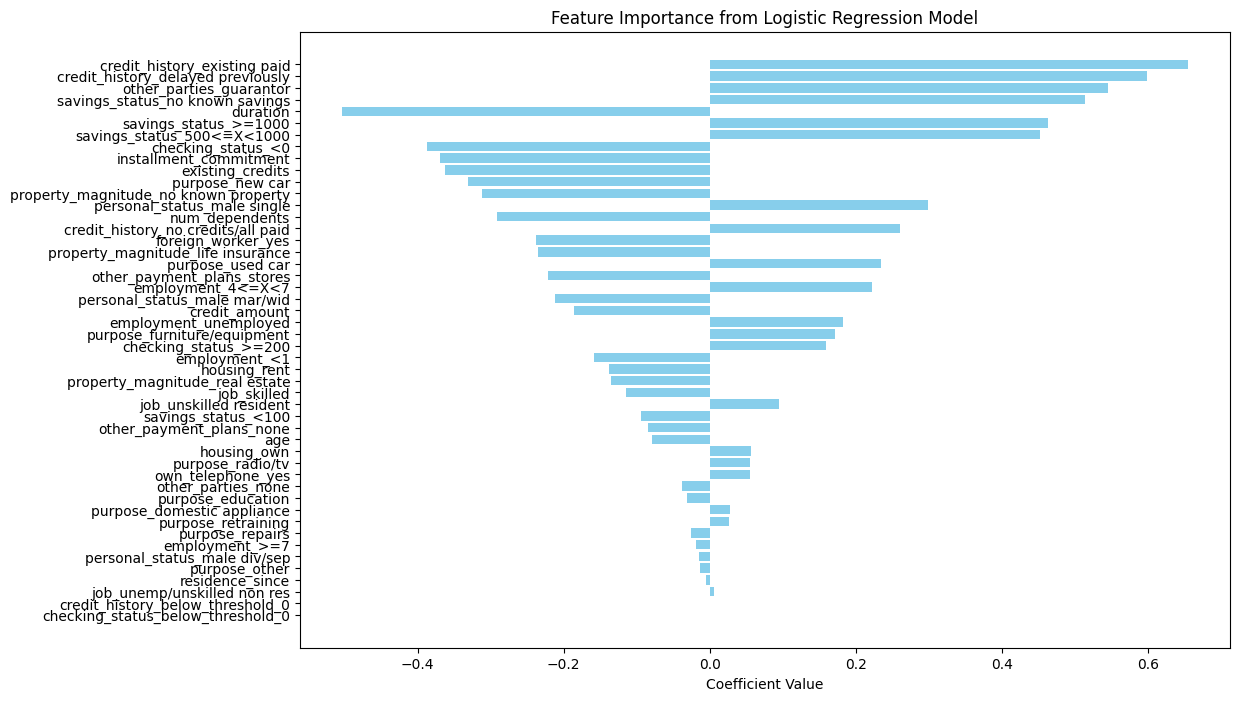

Top Features by Absolute Coefficient Value:
                                 Feature  Coefficient  Absolute Coefficient
10          credit_history_existing paid     0.653812              0.653812
9      credit_history_delayed previously     0.598434              0.598434
32               other_parties_guarantor     0.544431              0.544431
24       savings_status_no known savings     0.513622              0.513622
0                               duration    -0.503104              0.503104
23                 savings_status_>=1000     0.462931              0.462931
21            savings_status_500<=X<1000     0.452073              0.452073
7                     checking_status_<0    -0.387175              0.387175
2                 installment_commitment    -0.369104              0.369104
5                       existing_credits    -0.362397              0.362397
15                       purpose_new car    -0.330928              0.330928
35  property_magnitude_no known property    

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve feature names and coefficients
feature_names = X_0.columns
coefficients = model_0.coef_[0]

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of coefficients
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance from Logistic Regression Model')
plt.gca().invert_yaxis()  # To have the largest coefficients at the top
plt.show()

# Display the top features
print("Top Features by Absolute Coefficient Value:")
print(feature_importance)


Decision Tree Accuracy: 0.6153846153846154
Decision Tree Classification Report:
               precision    recall  f1-score   support

       False       0.60      0.61      0.61        57
        True       0.63      0.62      0.62        60

    accuracy                           0.62       117
   macro avg       0.62      0.62      0.62       117
weighted avg       0.62      0.62      0.62       117



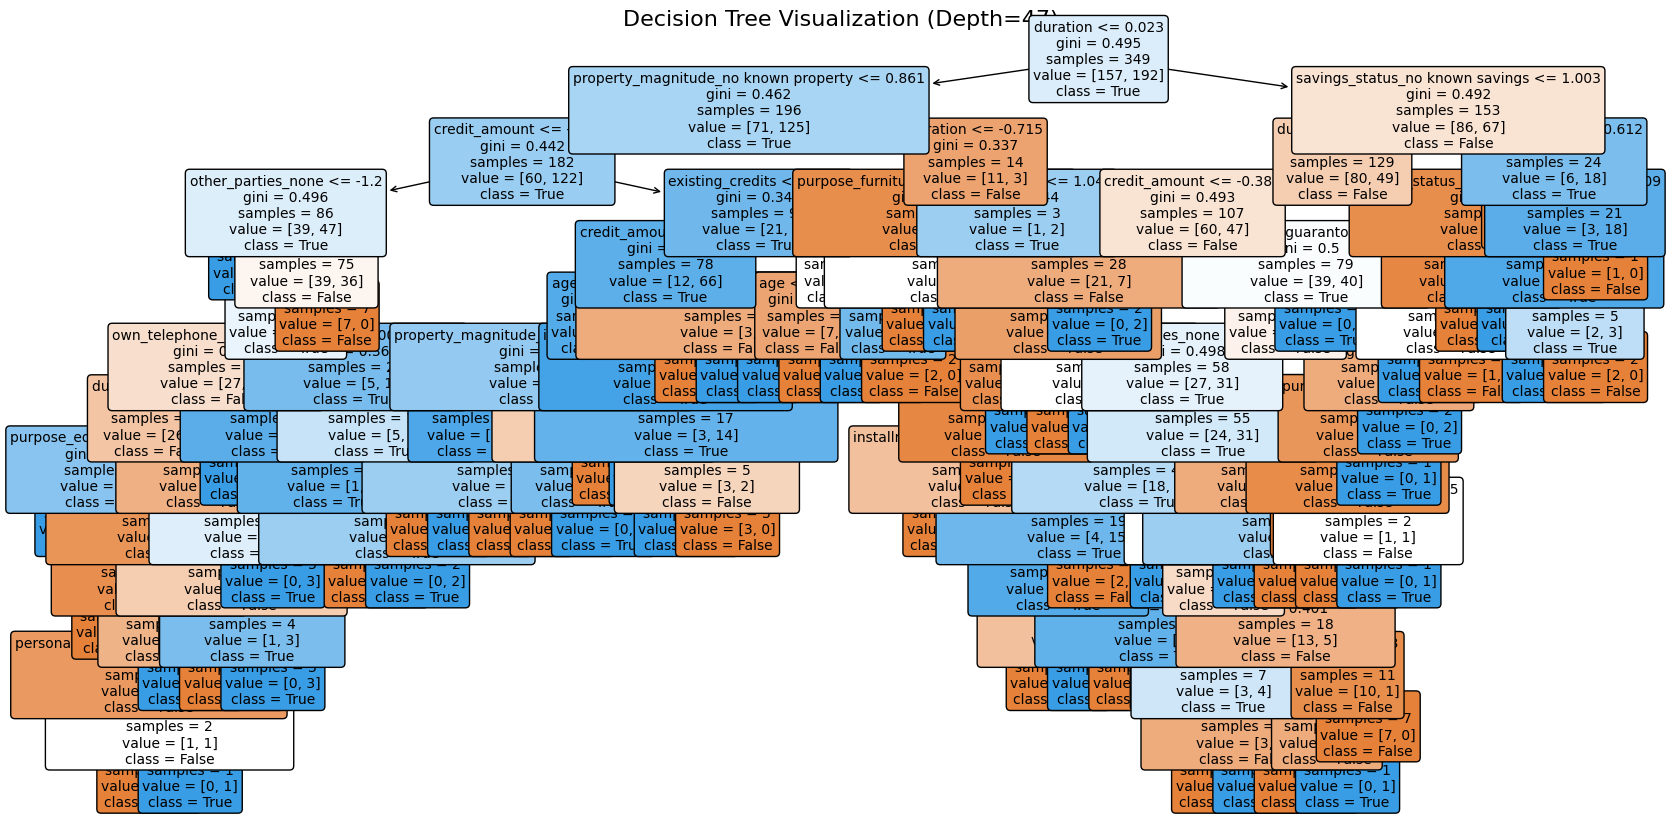

In [85]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define the desired depth of the decision tree
max_depth = 47  # Change this value to adjust the depth of the decision tree

# Assuming 'class_good_0' is the target variable
X_2 = troubleset.drop('class_good_0', axis=1)
y_2 = troubleset['class_good_0']

# Standardize the features
scaler_2 = StandardScaler()
X_scaled_2 = scaler_2.fit_transform(X_2)

# Train-test split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_scaled_2, y_2, test_size=0.25, random_state=42)

# Initialize and fit the Decision Tree model with the specified depth
model_2 = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
model_2.fit(X_train_2, y_train_2)

# Predictions
y_pred_2 = model_2.predict(X_test_2)

# Evaluation metrics
print("Decision Tree Accuracy:", accuracy_score(y_test_2, y_pred_2))
print("Decision Tree Classification Report:\n", classification_report(y_test_2, y_pred_2))

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model_2, filled=True, feature_names=X_2.columns, class_names=['False', 'True'], rounded=True, fontsize=10)
plt.title(f"Decision Tree Visualization (Depth={max_depth})", fontsize=16)
plt.show()


In [54]:
import numpy as np

# Evaluate the model with cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Print cross-validation results
print("Cross-validation Accuracy Scores: ", cv_scores)
print("Mean Cross-validation Accuracy: ", np.mean(cv_scores))
print("Standard Deviation of Cross-validation Accuracy: ", np.std(cv_scores))


Cross-validation Accuracy Scores:  [0.755 0.77  0.765 0.74  0.735]
Mean Cross-validation Accuracy:  0.753
Standard Deviation of Cross-validation Accuracy:  0.013638181696985868


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']  # Optimization algorithm
}

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Optionally, print the results for each parameter combination
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean Score: {mean_score:.4f} for Parameters: {params}")


Best Parameters: {'C': 0.01, 'solver': 'liblinear'}
Best Accuracy Score: 0.753
Mean Score: 0.7500 for Parameters: {'C': 0.01, 'solver': 'newton-cg'}
Mean Score: 0.7500 for Parameters: {'C': 0.01, 'solver': 'lbfgs'}
Mean Score: 0.7530 for Parameters: {'C': 0.01, 'solver': 'liblinear'}
Mean Score: 0.7500 for Parameters: {'C': 0.01, 'solver': 'saga'}
Mean Score: 0.7480 for Parameters: {'C': 0.1, 'solver': 'newton-cg'}
Mean Score: 0.7480 for Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Mean Score: 0.7480 for Parameters: {'C': 0.1, 'solver': 'liblinear'}
Mean Score: 0.7480 for Parameters: {'C': 0.1, 'solver': 'saga'}
Mean Score: 0.7530 for Parameters: {'C': 1, 'solver': 'newton-cg'}
Mean Score: 0.7530 for Parameters: {'C': 1, 'solver': 'lbfgs'}
Mean Score: 0.7520 for Parameters: {'C': 1, 'solver': 'liblinear'}
Mean Score: 0.7530 for Parameters: {'C': 1, 'solver': 'saga'}
Mean Score: 0.7510 for Parameters: {'C': 10, 'solver': 'newton-cg'}
Mean Score: 0.7510 for Parameters: {'C': 10, 'solver': '

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming 'class_good' is the target variable
X_2 = df_encoded.drop('class_good', axis=1)
y_2 = df_encoded['class_good']

# Standardize the features
scaler_2 = StandardScaler()
X_scaled_2 = scaler_2.fit_transform(X_2)

# Train-test split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_scaled_2, y_2, test_size=0.25, random_state=42)

# Initialize and fit the Decision Tree model
model_2 = DecisionTreeClassifier(random_state=42)
model_2.fit(X_train_2, y_train_2)

# Predictions
y_pred_2 = model_2.predict(X_test_2)

# Evaluation metrics
print("Decision Tree Accuracy:", accuracy_score(y_test_2, y_pred_2))
print("Decision Tree Classification Report:\n", classification_report(y_test_2, y_pred_2))


Decision Tree Accuracy: 0.716
Decision Tree Classification Report:
               precision    recall  f1-score   support

       False       0.51      0.47      0.49        72
        True       0.79      0.81      0.80       178

    accuracy                           0.72       250
   macro avg       0.65      0.64      0.65       250
weighted avg       0.71      0.72      0.71       250

